# **Predictive Analytics - Medical Cost Personal**

## **Deskripsi Proyek**

Memahami faktor-faktor yang memengaruhi biaya medis dapat membantu perusahaan asuransi dalam penentuan premi yang lebih akurat, penyedia layanan kesehatan dalam alokasi sumber daya, atau individu dalam perencanaan keuangan kesehatan. Dataset yang digunakan adalah `insurance.csv`. Dataset ini berisi informasi mengenai usia, jenis kelamin, indeks massa tubuh (BMI), jumlah anak, status perokok, wilayah tempat tinggal, dan biaya medis yang ditagihkan ke pasien.


## **1. Import Library yang Dibutuhkan**

In [1]:
!pip install -q kaggle

In [2]:

import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Data Understanding**

### 2.1 Data Loading

Dataset yang digunakan pada proyek ini:  
https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
from google.colab import files
files.upload()

target_folder = '/content/drive/MyDrive/MLT'
os.makedirs(target_folder, exist_ok=True)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mirichoi0218/insurance -p {target_folder}
with zipfile.ZipFile(f'{target_folder}/insurance.zip', 'r') as zip_ref:
   zip_ref.extractall(f'{target_folder}')


df = pd.read_csv('/content/drive/MyDrive/MLT/insurance.csv')

In [4]:
print("=== 5 Data Teratas ===")
print(df.head())

print("\n=== 5 Data Terbawah ===")
print(df.tail())

=== 5 Data Teratas ===
   age     sex   bmi  children smoker     region  charges
0   19  female 27.90         0    yes  southwest 16884.92
1   18    male 33.77         1     no  southeast  1725.55
2   28    male 33.00         3     no  southeast  4449.46
3   33    male 22.70         0     no  northwest 21984.47
4   32    male 28.88         0     no  northwest  3866.86

=== 5 Data Terbawah ===
      age     sex   bmi  children smoker     region  charges
1333   50    male 30.97         3     no  northwest 10600.55
1334   18  female 31.92         0     no  northeast  2205.98
1335   18  female 36.85         0     no  southeast  1629.83
1336   21  female 25.80         0     no  southwest  2007.94
1337   61  female 29.07         0    yes  northwest 29141.36


### 2.2 Exploratory Data Analysis (EDA)

2.2.1 Informasi Dasar Dataset

In [5]:
print("\n=== Informasi Dataset ===")
print(df.info())


=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
print("\n=== Statistik Deskriptif ===")
print(df.describe())


=== Statistik Deskriptif ===
          age     bmi  children  charges
count 1338.00 1338.00   1338.00  1338.00
mean    39.21   30.66      1.09 13270.42
std     14.05    6.10      1.21 12110.01
min     18.00   15.96      0.00  1121.87
25%     27.00   26.30      0.00  4740.29
50%     39.00   30.40      1.00  9382.03
75%     51.00   34.69      2.00 16639.91
max     64.00   53.13      5.00 63770.43


2.2.2 Penanganan *Missing Values* dan Duplikat

In [7]:
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
print("\n=== Duplikat Data ===")
print(f"Jumlah duplikat: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Jumlah duplikat setelah dihapus: {df.duplicated().sum()}")


=== Duplikat Data ===
Jumlah duplikat: 1
Jumlah duplikat setelah dihapus: 0


2.2.3 Analisis Unvariate

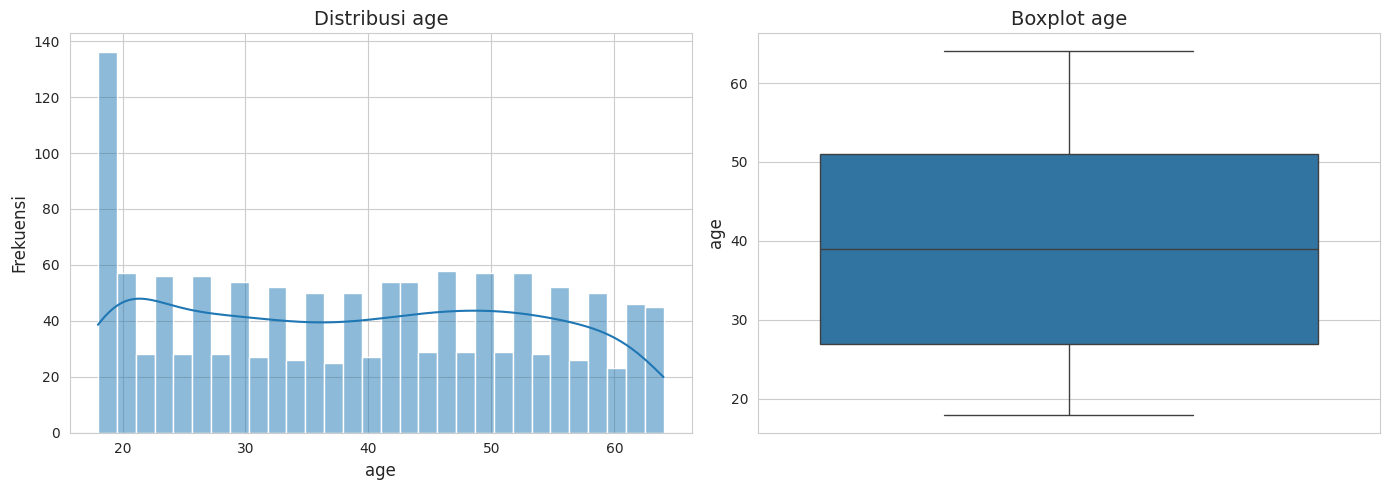

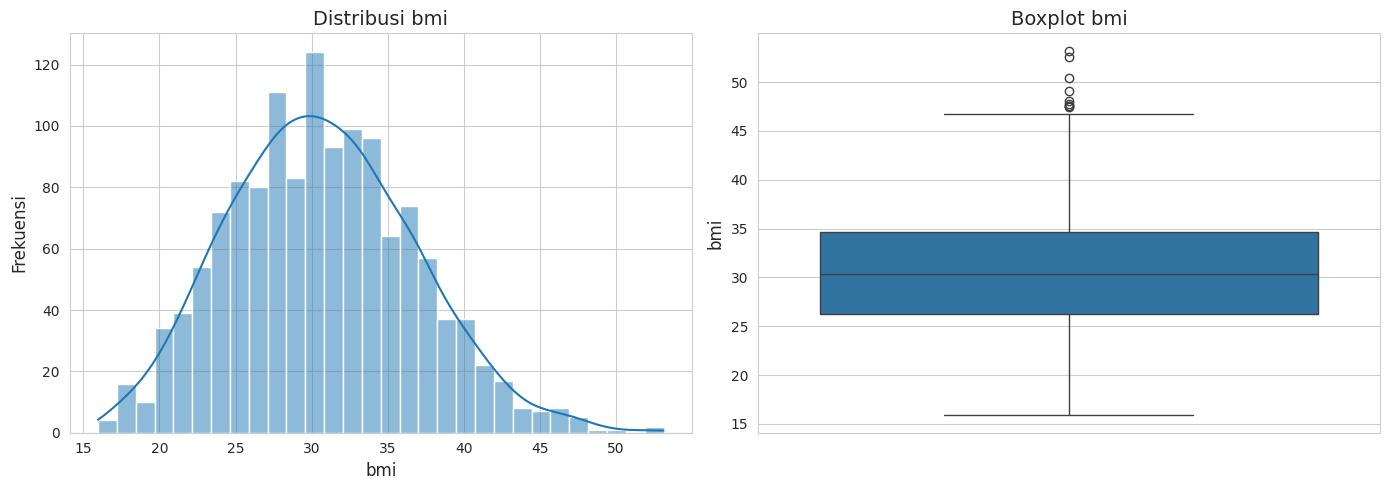

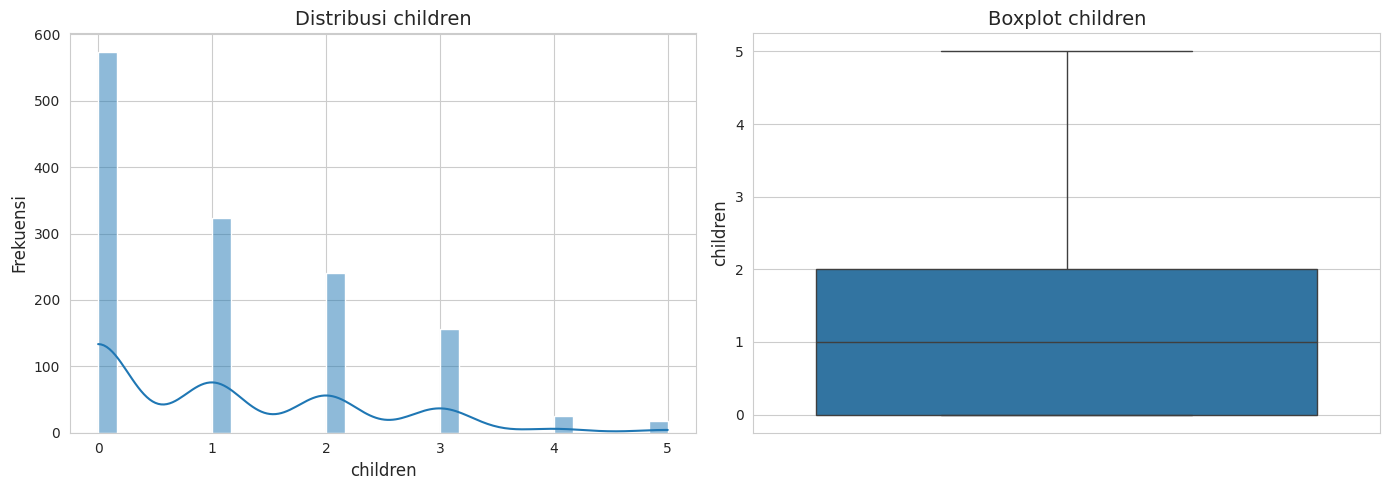

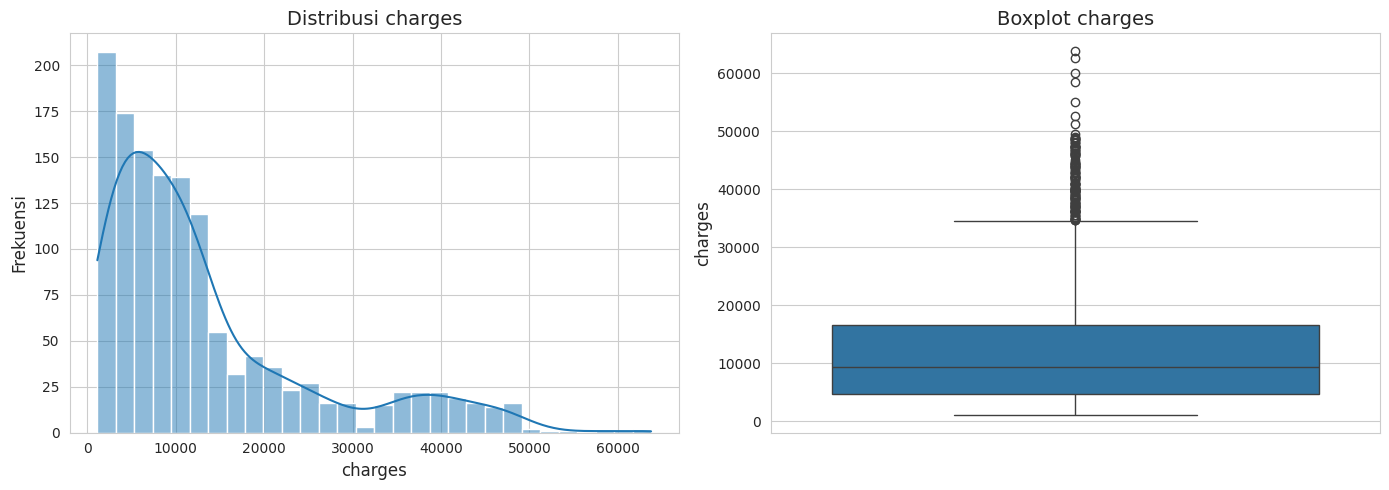

In [9]:
numerical_features = ['age', 'bmi', 'children', 'charges']

for feature in numerical_features:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribusi {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}', fontsize=14)
    plt.ylabel(feature, fontsize=12)

    plt.tight_layout()
    plt.show()

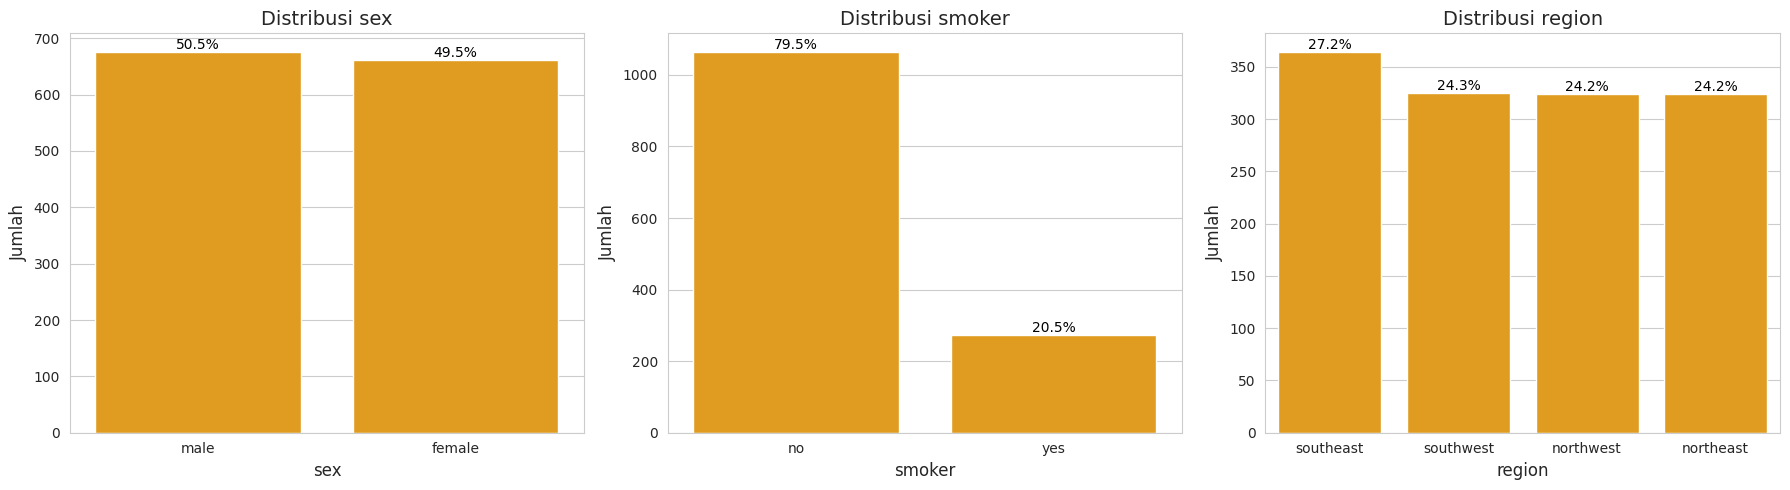

In [10]:
categorical_features = ['sex', 'smoker', 'region']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    ax = sns.countplot(x=feature, data=df, color='orange', order = df[feature].value_counts().index)
    plt.title(f'Distribusi {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    total = len(df[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x_text = p.get_x() + p.get_width() / 2
        y_text = p.get_height()
        ax.annotate(percentage, (x_text, y_text), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

2.2.4 Analisis Multivariate

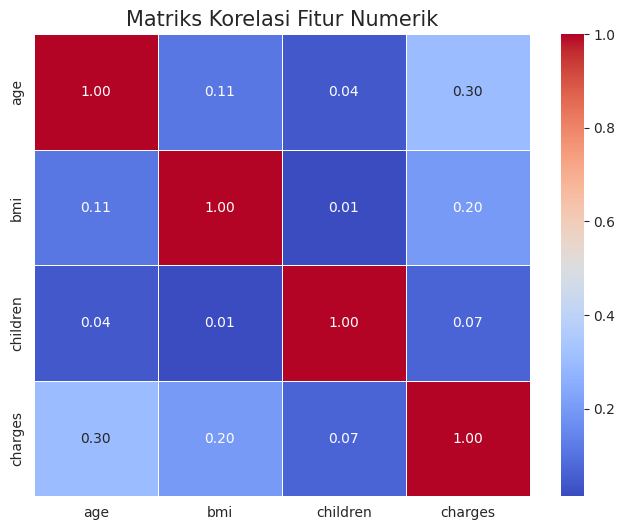

In [11]:
plt.figure(figsize=(8, 6))
numerical_df_for_corr = df[numerical_features].copy()
correlation_matrix = numerical_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Fitur Numerik', fontsize=15)
plt.show()

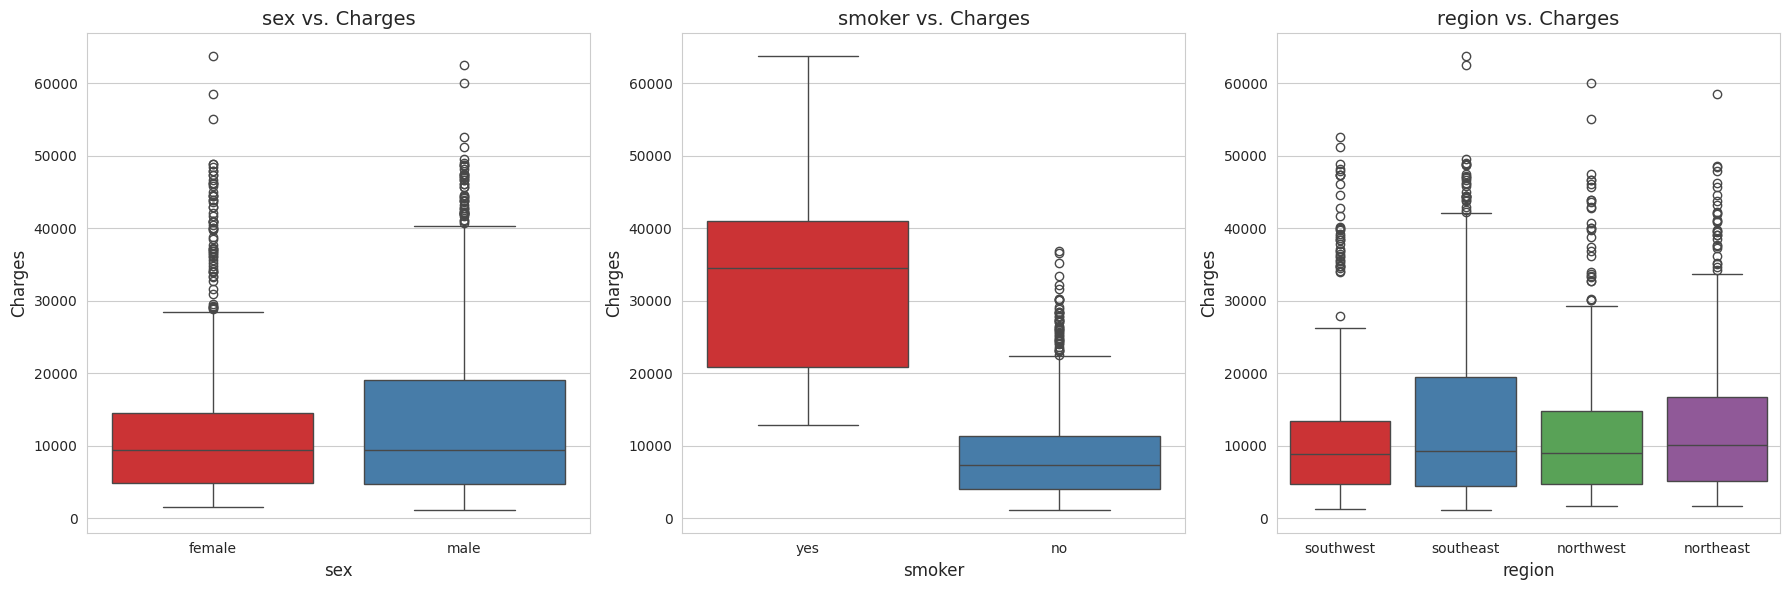

In [12]:
plt.figure(figsize=(18, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=feature, y='charges', data=df, palette='Set1')
    plt.title(f'{feature} vs. Charges', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Charges', fontsize=12)

plt.tight_layout()
plt.show()

2.2.5 Penanganan Outlier dan Transformasi charges

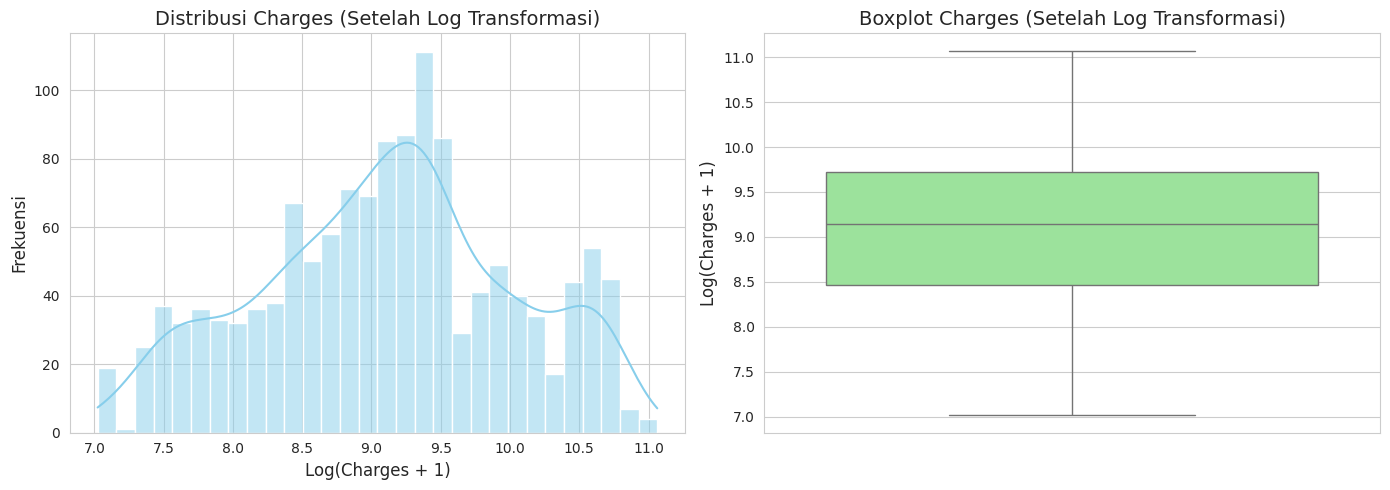

In [13]:
df['charges'] = np.log1p(df['charges'])

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Charges (Setelah Log Transformasi)', fontsize=14)
plt.xlabel('Log(Charges + 1)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['charges'], color='lightgreen')
plt.title('Boxplot Charges (Setelah Log Transformasi)', fontsize=14)
plt.ylabel('Log(Charges + 1)', fontsize=12)

plt.tight_layout()
plt.show()

## **3. Data Preparation**

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

3.1 Encoding Fitur Kategorikal

In [14]:
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Beberapa baris pertama setelah One-Hot Encoding:")
df_processed.head()

Beberapa baris pertama setelah One-Hot Encoding:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,9.73,False,True,False,False,True
1,18,33.77,1,7.45,True,False,False,True,False
2,28,33.00,3,8.40,True,False,False,True,False
3,33,22.70,0,10.00,True,False,True,False,False
4,32,28.88,0,8.26,True,False,True,False,False


3.2 Pemisahan Fitur (X) dan Target (Y)

In [15]:
X = df_processed.drop('charges', axis=1)
y = df_processed['charges']
print("Bentuk Fitur (X):")
print(X.shape)
print("Bentuk Target (y):")
print(y.shape)

Bentuk Fitur (X):
(1337, 8)
Bentuk Target (y):
(1337,)


3.3 Pembagian Data Latih dan Uji(Train-Test Split)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)
print(f'Total seluruh sampel dalam dataset: {len(X)}')
print(f'Total sampel dalam train dataset: {len(X_train)}')
print(f'Total samepl dalam test dataset: {len(X_test)}')

Ukuran X_train: (1069, 8)
Ukuran X_test: (268, 8)
Ukuran y_train: (1069,)
Ukuran y_test: (268,)
Total seluruh sampel dalam dataset: 1337
Total sampel dalam train dataset: 1069
Total samepl dalam test dataset: 268


3.4 Standarisasi Fitur Numerik

In [17]:
numerical_cols_to_scale = ['age', 'bmi', 'children']

scaler = StandardScaler()

X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Beberapa baris pertama X_train setelah standarisasi:")
X_train.head()

Beberapa baris pertama X_train setelah standarisasi:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1114,-1.16,-1.00,-0.91,True,False,False,False,False
968,-1.30,-0.79,0.77,True,False,False,False,False
599,0.91,1.15,0.77,False,False,True,False,False
170,1.70,1.81,-0.91,True,False,False,True,False
275,0.56,-0.65,0.77,False,False,False,False,False


## **4. Model Development**

In [18]:
model_performance_list = []

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train_log = model.predict(X_train)
    y_pred_test_log = model.predict(X_test)

    y_pred_train = np.expm1(y_pred_train_log)
    y_train_original = np.expm1(y_train)
    y_pred_test = np.expm1(y_pred_test_log)
    y_test_original = np.expm1(y_test)


    train_mae = mean_absolute_error(y_train_original, y_pred_train)
    test_mae = mean_absolute_error(y_test_original, y_pred_test)
    train_mse = mean_squared_error(y_train_original, y_pred_train)
    test_mse = mean_squared_error(y_test_original, y_pred_test)


    model_performance_list.append({
        'Model': model_name,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })
    print(f"{model_name} - Evaluasi Selesai.")

4.1 Model 1: *Linear Regression*

In [19]:
lr_model = LinearRegression()
evaluate_model(lr_model, 'Linear Regression', X_train, y_train, X_test, y_test)

Linear Regression - Evaluasi Selesai.


4.2. Model 2: *K-Nearest Neighbors* (KNN) *Regressor*

In [20]:
knn_model = KNeighborsRegressor(n_neighbors=7)
evaluate_model(knn_model, 'KNN Regressor', X_train, y_train, X_test, y_test)

KNN Regressor - Evaluasi Selesai.


4.3 Model 3: *Support Vector Regression* (SVR)

In [21]:
svr_model = SVR(kernel='rbf', C=1000, gamma=0.1)
evaluate_model(svr_model, 'SVR', X_train, y_train, X_test, y_test)

SVR - Evaluasi Selesai.


4.4 Model 4: *Random Forest Regressor*

In [22]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=7, min_samples_leaf=5, min_samples_split=10) # Parameter bisa di-tune
evaluate_model(rf_model, 'Random Forest Regressor', X_train, y_train, X_test, y_test)

Random Forest Regressor - Evaluasi Selesai.


4.5 Model 5: *Gradient Boosting Regressor*

In [23]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, random_state=42, max_depth=3, min_samples_leaf=10, min_samples_split=10) # Parameter bisa di-tune
evaluate_model(gbr_model, 'Gradient Boosting Regressor', X_train, y_train, X_test, y_test)

Gradient Boosting Regressor - Evaluasi Selesai.


## **5. Evaluasi Model**

5.1 Menampilkan tabel perbandingan skor MSE dan MAE untuk semua model yang diuji

In [24]:
model_performance_df = pd.DataFrame(model_performance_list)
print("Tabel Perbandingan Performa Model:")
model_performance_df.sort_values(by='Test MAE', ascending=True, inplace=True)
model_performance_df.reset_index(drop=True, inplace=True)
print(model_performance_df)

Tabel Perbandingan Performa Model:
                         Model  Train MAE  Test MAE   Train MSE    Test MSE
0      Random Forest Regressor    1795.02   1964.85 16824877.95 17779243.87
1  Gradient Boosting Regressor    1953.52   2031.02 19190813.56 19086712.12
2                          SVR    1926.94   3313.09 17964739.69 41462956.77
3            Linear Regression    4257.30   3755.92 70379311.89 51797278.35
4                KNN Regressor    3692.40   5090.79 51390020.71 94128237.52


5.2 Visualisasi Perbandingan Model

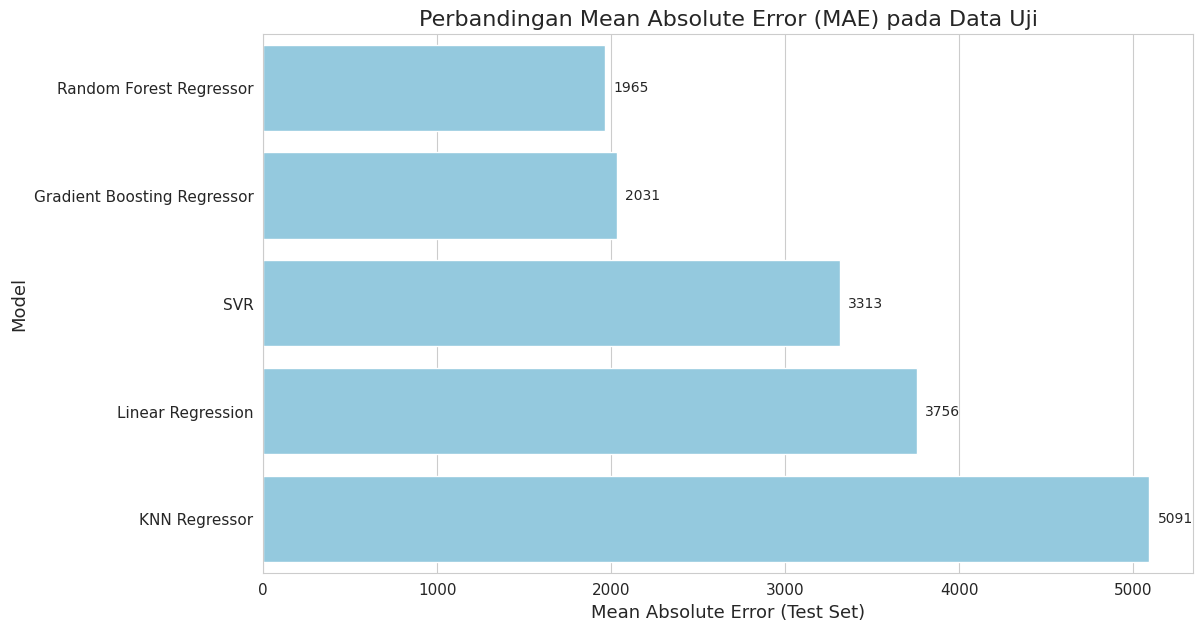

In [25]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Test MAE', y='Model', data=model_performance_df, color='skyblue', orient='h')
plt.title('Perbandingan Mean Absolute Error (MAE) pada Data Uji', fontsize=16)
plt.xlabel('Mean Absolute Error (Test Set)', fontsize=13)
plt.ylabel('Model', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
for index, value in enumerate(model_performance_df['Test MAE']):
    plt.text(value + 50, index, f'{value:.0f}', va='center', fontsize=10)
plt.show()